### **Project 2: Ames Housing Data and Kaggle Challenge**

# Ridge and Lasso Regularization on Every Variable Possible

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from modules.model_executor import run_model, submit_a_kaggle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)

## Read in Cleaned Data

In [2]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

In [3]:
# drop the Unnamed: 0 and pid columns
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

In [4]:
train.head()

,id,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_NA,alley_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_NA,bsmt_exposure_No,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,misc_feature_Gar2,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,109,60,69.0552,13517,4,6,8,1976,2005,289.0,4,3,3.0,3.0,7,533.0,1,0.0,192.0,725.0,5,1,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,1976.0,3,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1

## Feature Selection

**Again I will dump all of the features into the model. In this case I am testing how regularization handles all of the features**

In [5]:
X = train.drop(columns=['id', 'saleprice'])
y = train['saleprice']
z = test

In [6]:
z.head()

,id,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_NA,alley_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_NA,bsmt_exposure_No,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,misc_feature_Gar2,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,190,69.0000,9142,4,6,8,1910,1950,0.0,3,2,2.0,3.0,1,0.0,1,0.0,1020.0,1020.0,4,0,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,8,0,0,1910.0,2,1.0,440.0,1.0,1.0,3,0,60,112,0,0,0,0,4,2006,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,

## Model Evaluation

### First test the Ridge regularized model

In [7]:
pred_df_ridge, train_preds_ridge, y_train_ridge, kaggle_ridge = run_model(X, y, z, 'ridge')

Cross Val Scores: [0.81054171 0.67719724 0.89998757 0.75176636 0.91361786]
  Cross Val Mean: 0.8106221481089182


In [8]:
pred_df_ridge

,Key Metrics,Train,Test
0,R2,0.92839,0.90876
1,R2_adj,0.91674,0.84270
2,MAE,14541.27861,17152.39279
3,MSE,439779181.55786,609405470.71260
4,RMSE,20970.91275,24686.13924


## Plot True vs Predicted

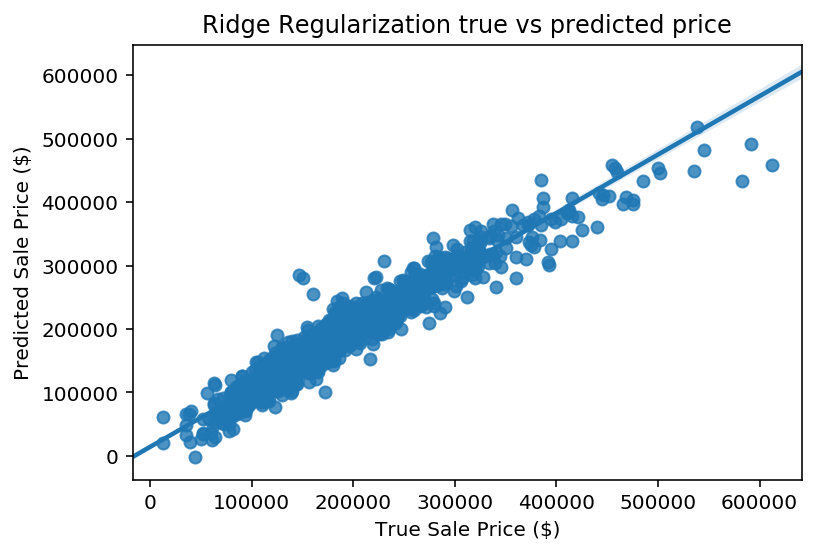

In [9]:
sns.regplot(y_train_ridge, train_preds_ridge)
plt.title('Ridge Regularization true vs predicted price')
plt.xlabel('True Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)');

### Second, test the Lasso regularized model

In [10]:
import warnings
warnings.simplefilter(action="ignore")

train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

# drop the Unnamed: 0 and pid columns
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

In [11]:
X = train.drop(columns=['id', 'saleprice'])
y = train['saleprice']
z = test

In [12]:
pred_df_lasso, train_preds_lasso, y_train_lasso, kaggle_lasso, lasso_coefs = run_model(X, y, z, 'lasso')

Cross Val Scores: [0.86514546 0.71659699 0.8732976  0.80645654 0.89361658]
  Cross Val Mean: 0.8310226319047966


In [13]:
pred_df_lasso

,Key Metrics,Train,Test
0,R2,0.88670,0.89539
1,R2_adj,0.86826,0.81965
2,MAE,16758.88624,17505.29113
3,MSE,695830497.06073,698699409.75771
4,RMSE,26378.59922,26432.92284


#### Lasso scored worse than Ridge

### Use stats model to find critical columns with significantly low p values

In [21]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

# drop the Unnamed: 0 and pid columns
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

X = train.drop(columns=['id', 'saleprice'])
y = train['saleprice']
z = test

In [22]:
z.shape

(878, 216)

In [23]:
summary, summary2, sigs = run_model(X, y, z, 'stats')

In [24]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     123.4
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:23:49   Log-Likelihood:                -23272.
No. Observations:                2050   AIC:                         4.696e+04
Df Residuals:                    1843   BIC:                         4.812e+04
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.754e+05   6.84e+05     -1.427      0.154   -2.32e+06    3.66e+05
ms_subclass            -92.0251     60.444     -1.522      0.128    -210.570      26.520
lot_frontage            81.9121     37.060      2.210      0.027       9.229     154.595
lot_area                 0.7178      0.118      6.074      0.000       0.486       0.950
utilities             2.319e+04   1.19e+04      1.945      0.052    -188.058    4.66e+04
overall_qual          7433.1996    778.966      9.542      0.000    5905.451    8960.948
overall_cond          5077.8283    676.522      7.506      0.000    3750.997    6404.659
year_built             236.1722     58.350      4.047      0.000     121.732     350.612
year_remod/add          46.0138     43.811      1.050      0.294     -39.911     131.938
mas_vnr_area            35.1676      4.728      7.438      0.000      25.894      44.441
exter_qual            7325.5904   1659.981      4.413      0.000    4069.949    1.06e+04
exter_cond           -2092.1162   1578.014     -1.326      0.185   -5187.000    1002.767
bsmt_qual             4616.4156   1388.630      3.324      0.001    1892.961    7339.870
bsmt_cond             -227.8839   1822.791     -0.125      0.901   -3802.836    3347.069
bsmtfin_type_1         -60.0298    321.387     -0.187      0.852    -690.351     570.292
bsmtfin_sf_1            30.2695    103.630      0.292      0.770    -172.976     233.515
bsmtfin_type_2         468.3930    713.077      0.657      0.511    -930.131    1866.917
bsmtfin_sf_2            16.6644    103.866      0.160      0.873    -187.044     220.373
bsmt_unf_sf             10.1729    103.636      0.098      0.922    -193.083     213.429
total_bsmt_sf            9.0213    103.578      0.087      0.931    -194.122     212.164
heating_qc            1258.2087    735.994      1.710      0.088    -185.261    2701.678
central_air          -5775.5200   2708.572     -2.132      0.033   -1.11e+04    -463.329
1st_flr_sf              15.4365      4.017      3.843      0.000       7.559      23.314
2nd_flr_sf              21.1153      3.653      5.780      0.000      13.950      28.281
low_qual_fin_sf         -1.7830      8.494     -0.210      0.834     -18.441      14.875
gr_liv_area             34.7688      3.678      9.453      0.000      27.555      41.983
bsmt_full_bath        2810.0927   1484.322      1.893      0.058    -101.036    5721.222
bsmt_half_bath        -394.2166   2227.435     -0.177      0.860   -4762.777    3974.344
full_bath             1044.0417   1641.929      0.636      0.525   -2176.195    4264.278
half_bath             2535.3992   1587.509      1.597      0.110    -578.106    5648.904
bedroom_abvgr        -3944.9710   1017.430     -3.877      0.000   -5940.408   -1949.534
kitchen_abvgr        -1.036e+04   4665.793     -2.219    

In [26]:
summary2.head()

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-975367.628592,683724.611300,-1.426550,1.538789e-01,-2.316324e+06,365588.629416
ms_subclass,-92.025053,60.443581,-1.522495,1.280566e-01,-2.105701e+02,26.520040
lot_frontage,81.912057,37.059629,2.210277,2.720839e-02,9.228785e+00,154.595329
lot_area,0.717798,0.118170,6.074264,1.509289e-09,4.860362e-01,0.949560
utilities,23186.479924,11918.171748,1.945473,5.186996e-02,-1.880582e+02,46561.018042


In [33]:
sigs.head()

,Features with p < 0.05
0,lot_frontage
1,lot_area
2,overall_qual
3,overall_cond
4,year_built


### Use the columns with the lowest p values in a ridge regression

In [34]:
stats_features = list(sigs['Features with p < 0.05'])

In [37]:
X = train[stats_features]
y = train['saleprice']
z = test[stats_features]
z['id'] = test['id']

In [39]:
pred_df_ridge2, train_preds_ridge2, y_train_ridge2, kaggle_ridge2 = run_model(X, y, z, 'ridge')

Cross Val Scores: [0.79305784 0.77159901 0.86472896 0.7554867  0.9049913 ]
  Cross Val Mean: 0.8179727623352638


In [40]:
pred_df_ridge2

,Key Metrics,Train,Test
0,R2,0.90384,0.89822
1,R2_adj,0.89925,0.88211
2,MAE,17100.64955,18153.86714
3,MSE,590561180.49876,679742267.21415
4,RMSE,24301.46458,26071.86735


#### This ridge model did slightly worse than the ridge model with all of the features in it

### Try the lasso model on these features

In [41]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

# drop the Unnamed: 0 and pid columns
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

X = train[stats_features]
y = train['saleprice']
z = test[stats_features]
z['id'] = test['id']

In [42]:
pred_df_lasso2, train_preds_lasso2, y_train_lasso2, kaggle_lasso2, lasso_coefs2 = run_model(X, y, z, 'lasso')

Cross Val Scores: [0.84289833 0.77956993 0.86900126 0.78609497 0.88680072]
  Cross Val Mean: 0.832873041928179


In [43]:
pred_df_lasso2

,Key Metrics,Train,Test
0,R2,0.86062,0.87651
1,R2_adj,0.85397,0.85695
2,MAE,18511.06008,19166.19023
3,MSE,855983215.81572,824759108.73282
4,RMSE,29257.19084,28718.61955


#### again the lasso with fewer features did worse

## Submit Predictions

In [45]:
kaggle_ridge.head()

,Id,SalePrice
0,2658,141097.360539
1,2718,148022.931245
2,2414,225435.400663
3,1989,98231.348607
4,625,180456.214055


In [46]:
submit_a_kaggle(kaggle_ridge, 4)